<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/AAM_WCS_ML_Challenge_Regression_House_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦾 Challenge
Dans ce défi, vous devrez faire une prédiction des ventes en utilisant la **régression linéaire multiple**. L'ensemble de données sera celui-ci. Vous devez essayer de trouver des colonnes pertinentes qui justifieront la régression linéaire multiple.

1. Créez un carnet de notes sur Google Colaboratory que vous nommerez : **Régression Ventes de maisons - Votre nom et prénom **
2. Réalisez une première analyse du [jeu de données](https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv), avec tout ce que vous savez (description, info, quantile, etc...), et une analyse graphique (notamment avec des boxplots, pairplots et heatmap de corrélation).
3. Effectuer une variété de régressions linéaires avec différentes entrées. C'est à vous de trouver les variables X les plus pertinentes. La cible (y) sera la colonne des prix. N'oubliez pas de diviser votre ensemble de données pour obtenir un score pertinent et d'imprimer le score R2 de l'ensemble de données testé. Comparez-le au score de l'entraînement pour éviter tout surajustement.
4. Les 4 dernières lignes n'ont pas de prix. Vous devrez prédire les prix et imprimer votre prédiction. Bien sûr, vous devriez faire des graphiques pour expliquer cela : vous êtes un analyste de données !
Ensuite, postez le lien vers votre carnet de notes lisible/commentable sur Google Colaboratory.

#Critères de validation
Le fichier lié peut être consulté par toute personne disposant du lien.
Les régressions linéaires multiples sont effectuées avec Scikit-Learn
Le score R2 de l'ensemble de test est affiché
La prédiction pour les 4 dernières lignes est affichée

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
link_dataset = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv"
data = pd.read_csv(link_dataset)

data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.160900e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401174e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671546e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.shape

(21613, 21)

In [ ]:
# pour exploiter la date dans le modèle, je vais extraire l'année et le mois (le jour semble peut pertinent, quoi que???) 
#et créer de nouvelles variables avec les éléments à convertir ensuite 
def function_year(date):
  for i in date :
    return date[0:4]

#test 
print(function_year('20141013T000000'))

def function_month(date):
  for i in date :
    return date[4:6]
#test
print(function_month('20141013T000000'))

def function_day(date):
  for i in date :
    return date[6:8]
#test
print(function_day('20141013T000000'))

2014
10
13


In [ ]:
#j'applique les fonctions pour obtenir les 3 nouvelles variables
data['year'] = data['date'].apply(function_year)
data['month'] = data['date'].apply(function_month)
data['day'] = data['date'].apply(function_day)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,09
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,02,25
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,09
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,02,18


In [ ]:
#je convertis en int 
data['year'] = pd.to_numeric(data['year'])
data['month'] = pd.to_numeric(data['month'])
data['day'] = pd.to_numeric(data['day'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#je checke les nuls avant de scinder le dataset
data.isnull().sum()

id               0
date             0
price            4
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

In [ ]:
#je crée le data_set avec les nuls pour les 4 prix à prédire
data_predict = data[data['price'].isnull()]
print(data_predict.shape)

(4, 24)


In [ ]:
#je crée le deuxième data_set 
data_clean = data.dropna()
print(data_clean.shape)

(21609, 24)


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21608
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21609 non-null  int64  
 1   date           21609 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21609 non-null  int64  
 4   bathrooms      21609 non-null  float64
 5   sqft_living    21609 non-null  int64  
 6   sqft_lot       21609 non-null  int64  
 7   floors         21609 non-null  float64
 8   waterfront     21609 non-null  int64  
 9   view           21609 non-null  int64  
 10  condition      21609 non-null  int64  
 11  grade          21609 non-null  int64  
 12  sqft_above     21609 non-null  int64  
 13  sqft_basement  21609 non-null  int64  
 14  yr_built       21609 non-null  int64  
 15  yr_renovated   21609 non-null  int64  
 16  zipcode        21609 non-null  int64  
 17  lat            21609 non-null  float64
 18  long  

In [ ]:
#je checke s'il y a des duplicates
print(data_clean.shape)
print(data_clean.drop_duplicates().shape)

(21609, 24)
(21609, 24)


Avant de poursuivre la description des données, choix des variables les plus pertinentes pour le modèle

Pour prédire le prix : 
- date -> la date de vente (prix tenant du compte de l'inflation et de l'évolution du marché)
- bedrooms -> le nombre de chambres
- bathrooms -> le nb de salles de bains et de toilettes (WC = 0.5)
- sqft_living -> surface habitable intérieure (en pieds carrés)
- sqft_lot -> surface habitable extérieure (en pieds carrés)
- floors -> nb d'étages
- waterfront -> vue mer
- view -> vue (score de 1 à 4)
- condition -> état de l'appartement (score de 1 à 5)
- grade -> qualité et design du bâtiment
- sqft_above -> surface au-dessus du sol (en pieds carrés)
- sqft_basement -> surface en sous-sol (en pieds carrés)
- yr_built -> année de construction
- yr_renovated -> année de la dernière rénovation
- lat -> latitude
- long -> longitude (avec lat = emplacement)
- sqft_living15 -> surface des logements proches (en pieds carrés)
- sqft_lot15 -> surface des lotissements voisins (espace extérieur en pieds carrés)


In [ ]:
#pour vérifier la variable bedrooms, je regarde la répartition des valeurs 
#(normalement entières et pas infinies : pas de 2.5 chambres)
data_clean['bedrooms'].value_counts()

3     9823
4     6881
2     2758
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

je constate que j'ai au moins un bien "suspect" avec 33 chambres (voire plus avec les 9,10 et 11 chambres... des châteaux ?)
Pour tenter d'en savoir plus, je vais croiser cette donnée avec la surface et le prix pour voir si c'est cohérent.

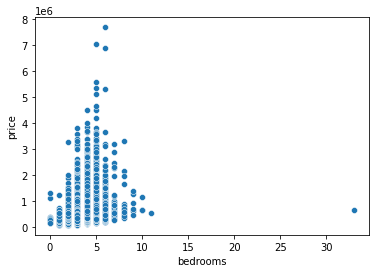

In [ ]:
sns.scatterplot(data = data_clean, x ='bedrooms', y='price')

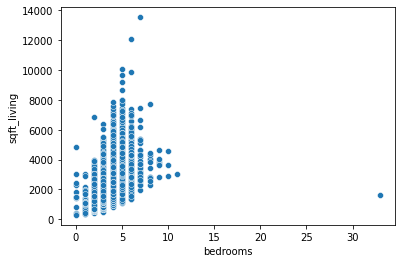

In [ ]:
sns.scatterplot(data = data_clean, x ='bedrooms', y='sqft_living')

Ces deux graphiques me permettent de comprendre que le bien avec 33 chambres est une erreur (on ne pas avoir 33 chambres dans si peu de surface et pour si peu cher). Je décide donc de supprimer cette observation. On aurait pu également la remplacer par le nombre de chambres moyens des biens avec la même grandeur de surface.

In [ ]:
data_clean[data_clean['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,6,25


In [ ]:
data_clean=data_clean.drop(index=15870)

In [ ]:
# je checke de la même manière les sdb/WC
data_clean['bathrooms'].value_counts(ascending = False)

2.50    5378
1.00    3852
1.75    3047
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

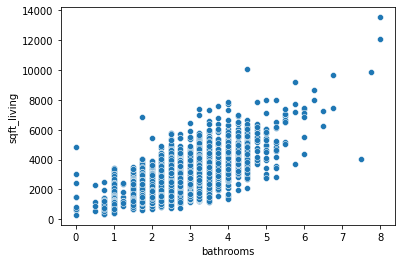

In [ ]:
# je vois que j'ai 10 biens avec aucun sanitaire --> peut-être des chambres de bonnes ? je préfère vérifier avec la surface :
sns.scatterplot(data = data_clean, x ='bathrooms', y='sqft_living')

Nombre de sanitaires et surface semblent relativement corrélés donc cohérents. Je n'y touche pas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


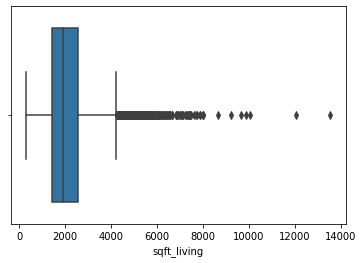

In [ ]:
#pour les surfaces habitables (intérieur et extérieur),je regarde avec des boîtes à moustaches si par exemple j'ai des outliers
sns.boxplot(data_clean['sqft_living'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


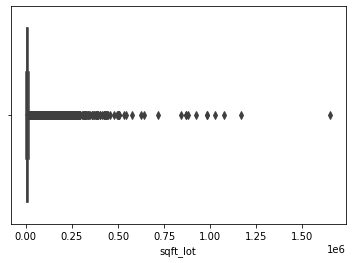

In [ ]:
sns.boxplot(data_clean['sqft_lot'])

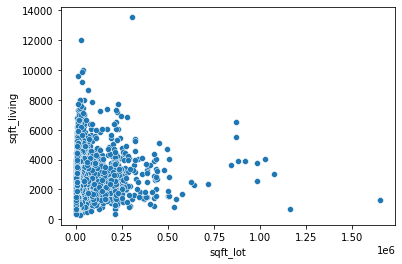

In [ ]:
#je regarde la distribution des deux variables entre elles et je constate que j'ai un bien avec beaucoup de surface
#extérieure (terrain) et très peu habitable. Je décide de la garder (peut-être un cas particulier de terrain quasi nu avec
#construction-extension à prévoir)
sns.scatterplot(data = data_clean, x ='sqft_lot', y='sqft_living')

In [ ]:
#je checke le nombre d'étages
data_clean['floors'].value_counts()

1.0    10679
2.0     8237
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Il y a des demi-étages mais rien ne paraît incohérent.

In [ ]:
#je checke les vues mer --> 163 bien seulement ont une vue mer
data_clean['waterfront'].value_counts(dropna=False)

0    21445
1      163
Name: waterfront, dtype: int64

In [ ]:
#je checke les vues --> les données ont l'air ok (score annoncé entre 0 et 4)
data_clean['view'].value_counts()

0    19484
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [ ]:
#je checke les conditions-état des biens --> les données ont l'air ok (score annoncé entre 1 et 5)
data_clean['condition'].value_counts()

3    14027
4     5679
5     1700
2      172
1       30
Name: condition, dtype: int64

In [ ]:
#je checke les grades --> les données ont l'air ok (score annoncé entre 1 et 13)
data_clean['grade'].value_counts()

7     8978
8     6066
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

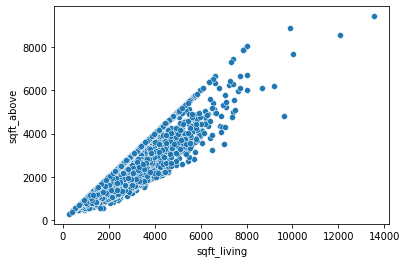

In [ ]:
#je vérifie les données de sqft_above
sns.scatterplot(data = data_clean, x ='sqft_living', y='sqft_above')

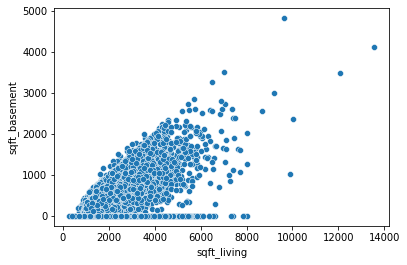

In [ ]:
#je vérifie les données de sqft_basement
sns.scatterplot(data = data_clean, x ='sqft_living', y='sqft_basement')

In [ ]:
#si je comprends bien les infos,
#les surfaces au-dessus du sol et au sous-sol devraient être égales à la surface habitable.
#je vais vérifier
#--> ça a l'air ok

data_clean['check_sqft'] = data_clean['sqft_above'] + data_clean['sqft_basement']
data_clean[['check_sqft','sqft_living']]

,check_sqft,sqft_living
0,1180,1180
1,2570,2570
2,770,770
3,1960,1960
4,1680,1680
...,...,...
21604,1490,1490
21605,2520,2520
21606,3510,3510
21607,1310,1310


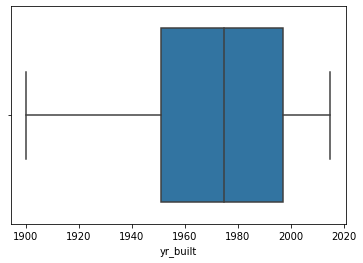

In [ ]:
#je vérifie les années de construction --> semble pas y avoir de données incohérentes
sns.boxplot(data = data_clean, x ='yr_built')

0       20694
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

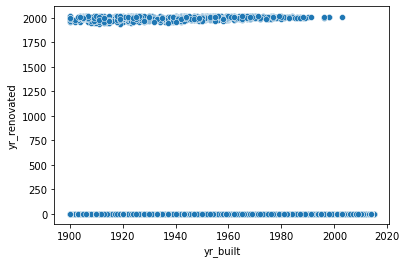

In [ ]:
# pareil avec les années de rénovation --> 20694 biens n'ont pas été renovés. Ce qui représente plus de 95% des cas...
sns.scatterplot(data = data_clean, y ='yr_renovated', x='yr_built')
data_clean['yr_renovated'].value_counts()

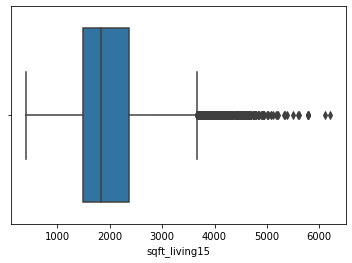

In [ ]:
#je checke la distribution des surfaces par rapport aux voisins
sns.boxplot(data = data_clean, x ='sqft_living15')

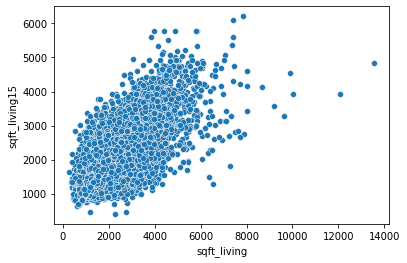

In [ ]:
sns.scatterplot(data = data_clean, x ='sqft_living', y='sqft_living15')

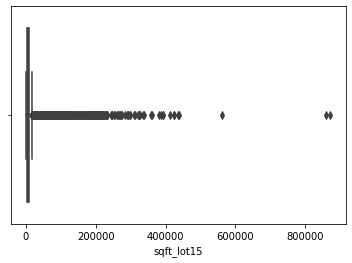

In [ ]:
#pareil avec les land lots
sns.boxplot(data = data_clean, x ='sqft_lot15')

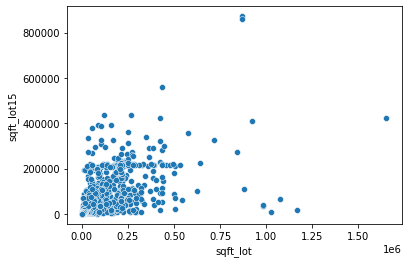

In [ ]:
sns.scatterplot(data = data_clean, x ='sqft_lot', y='sqft_lot15')

In [ ]:
# difficile de vérifier les coordonnées géographiques lat et long
#regarder pour afficher sur une carte ! :
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

# Je tente la carte


In [ ]:
data_clean[['lat','long']]

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
...,...,...
21604,47.5699,-122.288
21605,47.5137,-122.167
21606,47.5537,-122.398
21607,47.5773,-122.409


In [ ]:
import folium
m = folium.Map(location = [data_clean['lat'].mean(),data_clean['long'].mean()], zoom_start= 5)
m

Je comprends que je suis à la frontière Ouest Canada/USA 

In [ ]:
#j'essaie de positionner un premier bien sur la carte :
m = folium.Map(location=[47, -122],zoom_start=8)
folium.Marker(
    location=[47.5112,-122.257]
    ).add_to(m)
m

# Je suis avec le docteur Mamour !

In [ ]:
#petites manip pour sélectionner quelques biens (sinon trop de données pour la carte)
data_test_map = data_clean[data_clean['waterfront']==1]
data_test_map.shape

(163, 25)

In [ ]:
#je vais essayer de géolocaliser les biens sélectionnés

#je garde ma carte
#map_houses = folium.Map(location = [data_clean['lat'].mean(),data_clean['long'].mean()], zoom_start= 10)

for index, col in data_test_map.iterrows():
  print(index)
  # on récupère la position (latitude, longitude) du bien
  location = [col['lat'], col['long']]
  #print(row)
  # on ajoute le marker pour chaque bien
  marker = folium.Marker(location = location)
  marker.add_to(map_houses)

display(map_houses)

49
230
246
264
300
457
540
656
1081
1152
1157
1164
1168
1261
1315
1361
1417
1420
1484
1662
1949
2075
2085
2140
2179
2339
2444
2626
2864
2964
3157
3167
3252
3829
3914
3934
4013
4218
4220
4295
4369
4408
4426
4486
4635
4762
4912
5666
5716
5749
5760
5935
6102
6233
6402
6477
6508
6771
7313
7366
7700
7886
7989
8049
8092
8156
8163
8224
8277
8445
8450
8784
8978
9073
9085
9112
9175
9252
9856
10153
10263
10465
10840
11073
11115
11167
11225
11257
11402
11424
11446
11556
11844
12459
12613
12935
13238
13312
13525
13577
13710
13966
13967
14083
14187
14471
14619
14682
14774
14822
14827
15031
15039
15255
15330
15371
15377
15386
15415
15482
15512
15668
15692
15825
15840
15874
16187
16225
16333
16381
16418
16570
16781
16817
17152
17474
17558
17657
17767
17895
17902
18037
18199
18208
18275
18455
18556
18597
18722
18791
18828
18848
18914
19002
19104
19600
19622
19971
19984
20325
20767
21201
21576


MAINTENANT que j'ai vérifié et nettoyé mes données, je peux faire un modèle d'entrainement.

In [ ]:
data_clean.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,check_sqft
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,1180


# **TEST AVEC LA HOLDOUT METHOD**

In [ ]:
#je choisis les VI que je trouve pertinentes (tests en ajoutant/supprimant certaines):
X = data_clean[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
                'view','condition','grade',	'sqft_above','sqft_basement','yr_built',
                'lat','long','sqft_living15','sqft_lot15','year','month']]
#je détermine la VD :
y = data_clean['price']

#je sépare les dataset train et set :
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=67, train_size = 0.8)


#j'entraîne le modèle sur le dataset train :
model = LinearRegression().fit(X_train, y_train)

#j'affiche les deux R2
print('R2 pour le dataset Train =',model.score(X_train, y_train))
print('R2 pour le dataset Test =',model.score(X_test, y_test))

R2 pour le dataset Train = 0.6952358723505867
R2 pour le dataset Test = 0.7032046201405303


--> les deux R2 sont presque identiques : le modèle ne paraît pas overfitted.


# **JE TENTE AVEC LA MÉTHODE DE CROSS VALIDATION AVEC LES LEARNING CURVES**

Je détermine d'abord la taille de mon training set :

In [ ]:
len(X)

21608

In [ ]:
# mon dataset est d'une bonne taille (+ de 2K observations) donc je décide de faire 10 splits
len(X)/10

2160.8

In [ ]:
# me permet de connaître le nombre max d'observations pour mes sous-modèles
len(X) - 2161

19447

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [250,1000,2500, 4000, 5000, 8000, 10000, 12000, 15000, 17000, 19447]


train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=10)

In [ ]:
#je regarde les 
test_scores

array([[0.65815448, 0.63302348, 0.64969275, 0.62564651, 0.63835415,
        0.67377076, 0.67587201, 0.67711157, 0.64906217, 0.61622031],
       [0.68239836, 0.67602408, 0.68037554, 0.66977665, 0.6701067 ,
        0.69676071, 0.7032493 , 0.69833919, 0.67842748, 0.64352183],
       [0.68553795, 0.69598232, 0.68355892, 0.68804786, 0.67614659,
        0.69834111, 0.7045046 , 0.70249308, 0.68689567, 0.66606952],
       [0.69364462, 0.69275604, 0.67884547, 0.69376704, 0.67538696,
        0.69329485, 0.69987562, 0.69544935, 0.6846012 , 0.67386633],
       [0.69658073, 0.69317684, 0.67814917, 0.69475245, 0.6766531 ,
        0.69539758, 0.70292144, 0.69942082, 0.68854268, 0.67538207],
       [0.694709  , 0.69676114, 0.68167053, 0.69272459, 0.67670671,
        0.69463693, 0.70204316, 0.69939476, 0.68825714, 0.67344222],
       [0.69619759, 0.69611532, 0.6845292 , 0.69075032, 0.67847876,
        0.69639371, 0.70526465, 0.70404529, 0.69214272, 0.67018995],
       [0.69651413, 0.69574617, 0.6853774

In [ ]:
#je regarde les 
train_scores

array([[0.74549684, 0.73162561, 0.73162561, 0.73162561, 0.73162561,
        0.73162561, 0.73162561, 0.73162561, 0.73162561, 0.73162561],
       [0.75778413, 0.7249261 , 0.7249261 , 0.7249261 , 0.7249261 ,
        0.7249261 , 0.7249261 , 0.7249261 , 0.7249261 , 0.7249261 ],
       [0.70354474, 0.69710557, 0.70863413, 0.70863413, 0.70863413,
        0.70863413, 0.70863413, 0.70863413, 0.70863413, 0.70863413],
       [0.69422646, 0.69321074, 0.70439403, 0.70439403, 0.70439403,
        0.70439403, 0.70439403, 0.70439403, 0.70439403, 0.70439403],
       [0.70220934, 0.70260854, 0.70714833, 0.69779687, 0.69779687,
        0.69779687, 0.69779687, 0.69779687, 0.69779687, 0.69779687],
       [0.6913474 , 0.69024285, 0.6942328 , 0.69177471, 0.70036632,
        0.70036632, 0.70036632, 0.70036632, 0.70036632, 0.70036632],
       [0.69437989, 0.69398653, 0.69650898, 0.69555229, 0.6974206 ,
        0.69243839, 0.69243839, 0.69243839, 0.69243839, 0.69243839],
       [0.69359865, 0.69340093, 0.6953744

In [ ]:
#pour faire les learning curves, j'ai besoin de calculer les moyennes pour chaque taille de training set
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

In [ ]:
#je checke les arrays de moyennes :
print(train_scores_mean)
test_scores_mean

[0.73301273 0.7282119  0.70697234 0.70225895 0.69965443 0.69697957
 0.69400403 0.69471772 0.69717002 0.69752088 0.69710743]


array([0.64969082, 0.67989798, 0.68875776, 0.68814875, 0.69009769,
       0.69003462, 0.69141075, 0.69226345, 0.69291183, 0.69324446,
       0.69253567])

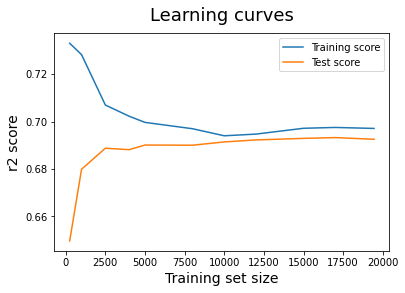

In [ ]:
#je peux faire mes graphiques
import matplotlib.pyplot as plt


plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

# Je décide donc d'appliquer mon modèle au dataset à prédire :


In [ ]:
#je reprends les mêmes variables que dans le modèle précédent sur mon dataset predict
X_predict = data_predict[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
                'view','condition','grade',	'sqft_above','sqft_basement','yr_built',
                'lat','long','sqft_living15','sqft_lot15','year','month']]
# je fais les prédictions avec .predict et je les mets dans la colonne 'price':
data_predict['price'] = model.predict(X_predict)
data_predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
21609,6600060120,20150223T000000,485500.192942,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,1523300141,20140623T000000,147910.783088,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,291310100,20150116T000000,389210.546015,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16
21612,1523300157,20141015T000000,157574.359154,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,2014,10,15


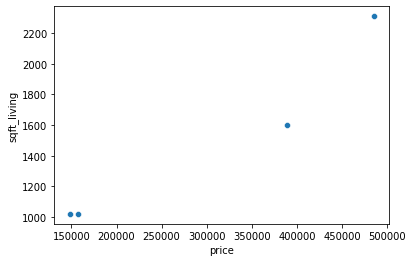

In [ ]:
# je "vérifie" graphiquement mes prix prédits en fonction de la surface habitable --> ça semble cohérent
sns.scatterplot(data=data_predict, x='price', y='sqft_living')

In [ ]:
#je crée un 'flag' pour distinguer les vraies valeurs des valeurs prédites avant de joindre les deux sous datasets
data_clean['flag'] = 'real price'
data_predict['flag'] = 'predicted price'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#je concat les deux sous dataset
data_complete = pd.concat([data_clean, data_predict])
data_complete.shape

(21612, 26)

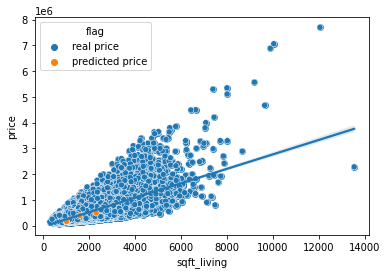

In [ ]:
#je vérifie graphiquement mes valeurs prix réelles et prédites
sns.regplot(data = data_complete, x='sqft_living',y='price')
sns.scatterplot(data = data_complete, x='sqft_living',y='price', hue='flag')